In [1]:
def convert_time_to_seconds(time_str):
  """
  Converts a string of the format "hrs-min-sec" into seconds as an integer.

  Args:
    time_str: A string of the format "hrs-min-sec".

  Returns:
    An integer representing the time in seconds.
  """

  hours, minutes, seconds = time_str.split(':')
  if hours=='':
    hours =0
  if minutes=='':
    minutes =0
  if seconds=='':
    seconds=0
  hours = int(hours)
  minutes = int(minutes)
  seconds = int(seconds)
  return hours * 3600 + minutes * 60 + seconds

# Example usage
time_str = "2:30:45"
seconds = convert_time_to_seconds(time_str)
print(f"{time_str} in seconds is {seconds}")

2:30:45 in seconds is 9045


In [2]:
import pandas as pd
df = pd.read_csv('stop_times.csv')
df['arrival_time'] = df['arrival_time'].apply(convert_time_to_seconds)
df['departure_time'] = df['departure_time'].apply(convert_time_to_seconds)
df

,trip_id,arrival_time,departure_time,stop_id,stop_sequence
0,1_07_00,25200,25200,23,0
1,1_07_00,25425,25425,24,1
2,1_07_00,25700,25700,25,2
3,1_07_00,25843,25843,26,3
4,1_07_00,25971,25971,27,4
...,...,...,...,...,...
2250285,1268_21_30,89416,89416,371,84
2250286,1268_21_30,89592,89592,372,85
2250287,1268_21_30,89725,89725,1736,86
2250288,1268_21_30,90141,90141,1738,87


In [3]:
# df.drop(['trip_id'],inplace=True,axis='columns')
df

,trip_id,arrival_time,departure_time,stop_id,stop_sequence
0,1_07_00,25200,25200,23,0
1,1_07_00,25425,25425,24,1
2,1_07_00,25700,25700,25,2
3,1_07_00,25843,25843,26,3
4,1_07_00,25971,25971,27,4
...,...,...,...,...,...
2250285,1268_21_30,89416,89416,371,84
2250286,1268_21_30,89592,89592,372,85
2250287,1268_21_30,89725,89725,1736,86
2250288,1268_21_30,90141,90141,1738,87


In [4]:
i =0
X = {"time":[],"stop id":[]}
y = {"time":[]}
while i<(len(df['stop_sequence'])-1):
    while i<(len(df['stop_sequence'])-1) and df['stop_sequence'].values[i]<df['stop_sequence'].values[i+1]:
        X['time'].append(df['departure_time'].values[i])
        X['stop id'].append(df['stop_id'].values[i])
        y['time'].append(df['arrival_time'].values[i+1])
        i += 1
    i += 1
X['time']

[25200,
 25425,
 25700,
 25843,
 25971,
 26143,
 26272,
 26309,
 26416,
 26516,
 26788,
 26937,
 27009,
 27088,
 27144,
 27290,
 27373,
 27483,
 27544,
 27711,
 27826,
 27951,
 28038,
 28194,
 28301,
 28454,
 28532,
 28869,
 28907,
 29016,
 29166,
 29239,
 29367,
 29443,
 29635,
 29723,
 29874,
 30263,
 30482,
 30544,
 30807,
 31049,
 31151,
 31213,
 31585,
 25800,
 26025,
 26300,
 26443,
 26571,
 26743,
 26872,
 26909,
 27016,
 27116,
 27388,
 27537,
 27609,
 27688,
 27744,
 27890,
 27973,
 28083,
 28144,
 28311,
 28426,
 28551,
 28638,
 28794,
 28901,
 29054,
 29132,
 29469,
 29507,
 29616,
 29766,
 29839,
 29967,
 30043,
 30235,
 30323,
 30474,
 30863,
 31082,
 31144,
 31407,
 31649,
 31751,
 31813,
 32185,
 26400,
 26625,
 26900,
 27043,
 27171,
 27343,
 27472,
 27509,
 27616,
 27716,
 27988,
 28137,
 28209,
 28288,
 28344,
 28490,
 28573,
 28683,
 28744,
 28911,
 29026,
 29151,
 29238,
 29394,
 29501,
 29654,
 29732,
 30069,
 30107,
 30216,
 30366,
 30439,
 30567,
 30643,
 30835,


In [5]:
y['time']

[25425,
 25700,
 25843,
 25971,
 26143,
 26272,
 26309,
 26416,
 26516,
 26788,
 26937,
 27009,
 27088,
 27144,
 27290,
 27373,
 27483,
 27544,
 27711,
 27826,
 27951,
 28038,
 28194,
 28301,
 28454,
 28532,
 28869,
 28907,
 29016,
 29166,
 29239,
 29367,
 29443,
 29635,
 29723,
 29874,
 30263,
 30482,
 30544,
 30807,
 31049,
 31151,
 31213,
 31585,
 31662,
 26025,
 26300,
 26443,
 26571,
 26743,
 26872,
 26909,
 27016,
 27116,
 27388,
 27537,
 27609,
 27688,
 27744,
 27890,
 27973,
 28083,
 28144,
 28311,
 28426,
 28551,
 28638,
 28794,
 28901,
 29054,
 29132,
 29469,
 29507,
 29616,
 29766,
 29839,
 29967,
 30043,
 30235,
 30323,
 30474,
 30863,
 31082,
 31144,
 31407,
 31649,
 31751,
 31813,
 32185,
 32262,
 26625,
 26900,
 27043,
 27171,
 27343,
 27472,
 27509,
 27616,
 27716,
 27988,
 28137,
 28209,
 28288,
 28344,
 28490,
 28573,
 28683,
 28744,
 28911,
 29026,
 29151,
 29238,
 29394,
 29501,
 29654,
 29732,
 30069,
 30107,
 30216,
 30366,
 30439,
 30567,
 30643,
 30835,
 30923,


In [8]:
file_name = 'input_data.csv'
xexport = pd.DataFrame(X)
# Export the DataFrame to a CSV file
xexport.to_csv(file_name, index=False)

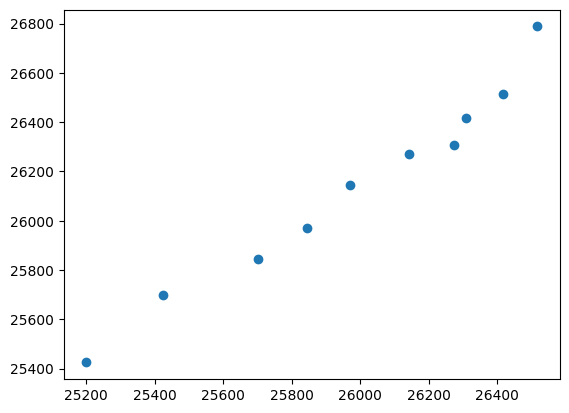

In [ ]:
xdf = pd.DataFrame(X)
ydf = pd.DataFrame(y)
from matplotlib import pyplot as plt
plt.scatter(xdf['time'].head(10),ydf.head(10))